In [1]:
# SPDX-FileCopyrightText: 2021 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad_jax is not installed 
!pip install noloadj --quiet


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<H1>NoLoad tutorial</H1>
Based on test functions: 
<A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" 
target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Constrained mono-objective optimization</H2>

<img src=".\img\BinhAndKorn.png"/>

<H3>function definition</H3>

In [2]:
def BinhAndKorn(x, y):
    f1 = 4*x**2   + 4*y**2
    f2 = (x-5)**2 + (y-5)**2
    g1 = (x-5)**2 + y
    g2 = (x-8)**2 + (y+3)**2
    return locals().items()

<H3>plot function</H3>

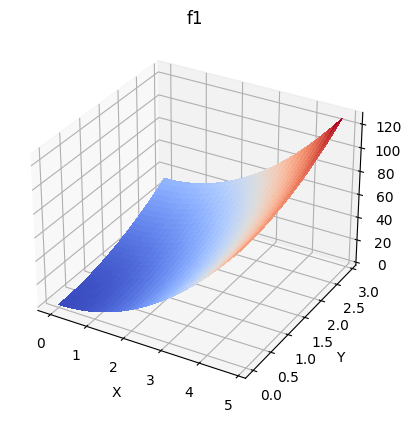

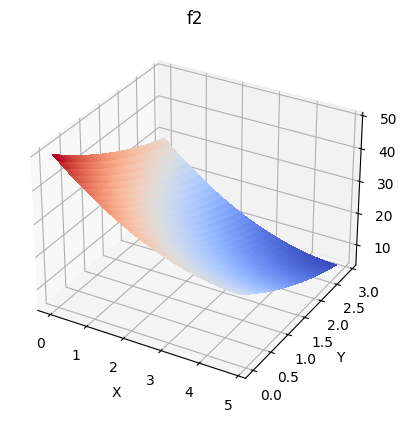

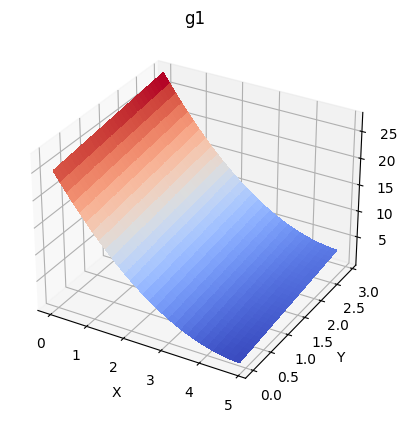

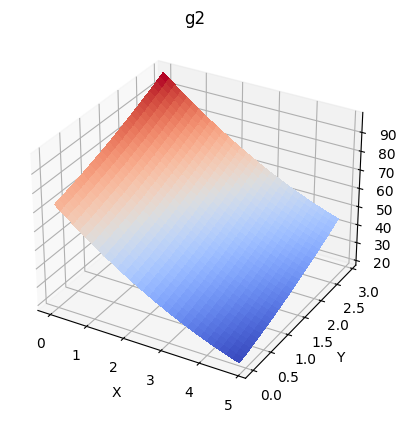

In [3]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(BinhAndKorn, [[0, 5], [0, 3]], outNames = ['f1','f2','g1','g2'])



<H3>optimize using NoLoad</H3>

Optimization terminated successfully 	(Exit mode 0)
			Current function value: 0.0
			Iterations: 1
			Function evaluations: 1
			Gradient evaluations: 1
Optimization terminated successfully 	(Exit mode 0)
			Current function value: 4.0
			Iterations: 3
			Function evaluations: 3
			Gradient evaluations: 3
new initial point:  [0.87263017 2.29261982]
Optimization terminated successfully 	(Exit mode 0)
			Current function value: 13.723793794433604
			Iterations: 6
			Function evaluations: 7
			Gradient evaluations: 6
Optimization terminated successfully 	(Exit mode 0)
			Current function value: 8.138840199573481
			Iterations: 6
			Function evaluations: 6
			Gradient evaluations: 6
Optimization terminated successfully 	(Exit mode 0)
			Current function value: 5.698203955096634
			Iterations: 5
			Function evaluations: 5
			Gradient evaluations: 5
{'x': 3.696848452751318, 'y': 3.0}
{'f1': 90.66675393043926, 'f2': 5.698203955096634, 'g1': 4.698203955096634, 'g2': 54.51711323858872}


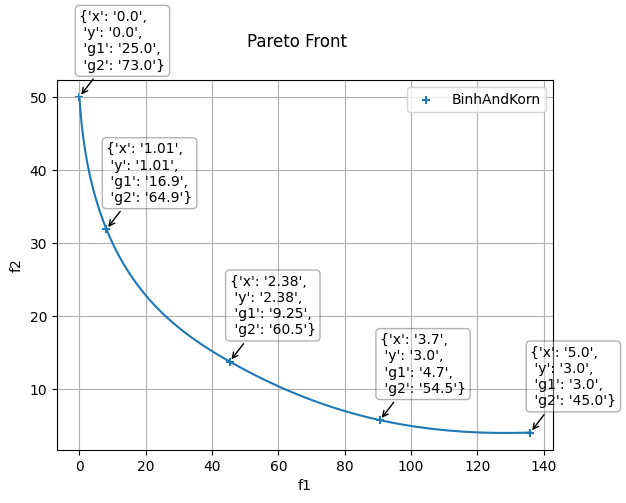

In [4]:
#Optimize
from noloadj.optimization.optimProblem import Spec, OptimProblem
spec = Spec(variables={'x':0, 'y':0}, bounds={'x':[0, 5], 'y':[0, 3]}, 
            objectives={'f1':[0.,140.],'f2':[0.,50.]},
            ineq_cstr={'g1':[None, 25],'g2':[20, None]} #inequality constraints
            )
optim = OptimProblem(model=BinhAndKorn, specifications=spec)
result = optim.run(nbParetoPts=5)

result.printResults()
result.plotPareto(['BinhAndKorn'],'Pareto Front',nb_annotation=5)


<H3>check constraints</H3>

In [7]:
#get constraints for each optimal solutions :
g1i = result.resultsHandler.oNames.index('g1')
g2i = result.resultsHandler.oNames.index('g2')
sols = result.resultsHandler.solutions
for sol in sols:
    print('----------')
    print('x  =', sol.iData[0], '  \ty =', sol.iData[1])
    print('g1 =', sol.oData[g1i], '  \tg2 =', sol.oData[g2i])

----------
x  = 0.0   	y = 0.0
g1 = 25.0   	g2 = 73.0
----------
x  = 1.0086402425069165   	y = 1.0086401296245153
g1 = 16.939592843359762   	g2 = 64.9483069475298
----------
x  = 2.3800537195167744   	y = 2.3809018189812523
g1 = 9.245020331599141   	g2 = 60.537900581032986
----------
x  = 3.696848452751318   	y = 3.0
g1 = 4.698203955096634   	g2 = 54.51711323858872
----------
x  = 5.0   	y = 3.0
g1 = 3.0   	g2 = 45.0
